In [ ]:
import os

directorio_principal = '/content/drive/My Drive/Colab_Notebooks/Armas/Sohas_weapon-Classification'

# Lista los archivos en el directorio
archivos = os.listdir(directorio_principal)

# Imprime los nombres de los archivos
for archivo in archivos:
    print(archivo)


billete
knife
monedero
pistol
smartphone
tarjeta


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Ruta al directorio que contiene las subcarpetas (clases)
directorio_principal = '/content/drive/My Drive/Colab_Notebooks/Armas/Sohas_weapon-Classification'

# Cambiar al directorio principal
os.chdir(directorio_principal)

# Lista para almacenar las imágenes y las etiquetas
imagenes = []
etiquetas = []

# Lista de nombres de las etiquetas
nombres_etiquetas = os.listdir(directorio_principal)

# Recorrer las subcarpetas (clases)
for etiqueta, nombre_etiqueta in enumerate(nombres_etiquetas):
    carpeta_etiqueta = os.path.join(directorio_principal, nombre_etiqueta)

    # Obtener la lista de archivos en la subcarpeta
    archivos_imagenes = os.listdir(carpeta_etiqueta)

    # Recorrer los archivos en la subcarpeta
    for archivo in archivos_imagenes:
        # Comprobar si el archivo es una imagen (ajustar según el formato de tus imágenes)
        if archivo.endswith(('.jpg', '.jpeg', '.png')):
            # Construir la ruta completa de la imagen
            ruta_imagen = os.path.join(carpeta_etiqueta, archivo)

            # Cargar la imagen y redimensionar usando TensorFlow
            imagen = tf.keras.preprocessing.image.load_img(ruta_imagen, color_mode='grayscale', target_size=(28, 28))
            imagen_array = tf.keras.preprocessing.image.img_to_array(imagen)

            # Añadir la imagen y la etiqueta a las listas
            imagenes.append(imagen_array)
            etiquetas.append(etiqueta)

# Convertir las listas a numpy arrays
datos_np = np.array(imagenes)
etiquetas_np = np.array(etiquetas)

# Imprimir las formas de los arrays
print("Forma de los datos:", datos_np.shape)
print("Forma de las etiquetas:", etiquetas_np.shape)

# Convertir las etiquetas a un tensor de forma (batch_size,)
etiquetas_np = etiquetas_np.reshape(-1)

# Imprimir las formas actualizadas
print("Forma de los datos:", datos_np.shape)
print("Forma de las etiquetas:", etiquetas_np.shape)

Forma de los datos: (9544, 28, 28, 1)
Forma de las etiquetas: (9544,)
Forma de los datos: (9544, 28, 28, 1)
Forma de las etiquetas: (9544,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Definir algunos parámetros importantes
width_shape = 28  # Ajustado al tamaño de las imágenes de entrada
height_shape = 28  # Ajustado al tamaño de las imágenes de entrada
num_classes = 6  # Número de clases que has proporcionado
epochs = 50
batch_size = 32
class_names = ['billete', 'knife', 'monedero', 'pistol', 'smartphone', 'tarjeta']

# Ruta al directorio que contiene las subcarpetas (clases)
directorio_principal = '/content/drive/My Drive/Colab_Notebooks/Armas/Sohas_weapon-Classification'

# Configurar el generador de datos de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Proporción para datos de validación
    rotation_range=15,  # Rango de rotación aleatoria
    width_shift_range=0.1,  # Rango de cambio horizontal aleatorio
    height_shift_range=0.1,  # Rango de cambio vertical aleatorio
    shear_range=0.1,  # Rango de deformación
    zoom_range=0.1,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    fill_mode='nearest'
)

# Configurar el generador de datos de validación
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    directorio_principal,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    classes=class_names,
    subset='training'  # Indicar que estos son datos de entrenamiento
)

# Generador de datos de validación
val_generator = val_datagen.flow_from_directory(
    directorio_principal,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    classes=class_names,
    subset='validation'  # Indicar que estos son datos de validación
)

Found 7638 images belonging to 6 classes.
Found 1906 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Modelo de red neuronal convolucional
model = Sequential()

## Extracción de Características
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(width_shape, height_shape, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

## Clasificación
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

# Resumen del modelo CNN
model.summary()

# Compilar el modelo
opt = Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Entrenar el modelo utilizando los generadores de datos
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        5

In [ ]:
# Resumen de pérdida y precisión
print("\nResumen del entrenamiento:")
print("Pérdida final:", history.history['loss'][-1])
print("Precisión final:", history.history['accuracy'][-1])
print("\nResumen de la validación:")
print("Pérdida final:", history.history['val_loss'][-1])
print("Precisión final:", history.history['val_accuracy'][-1])


Resumen del entrenamiento:
Pérdida final: 0.791172981262207
Precisión final: 0.70816969871521

Resumen de la validación:
Pérdida final: 0.6788288354873657
Precisión final: 0.7660021185874939


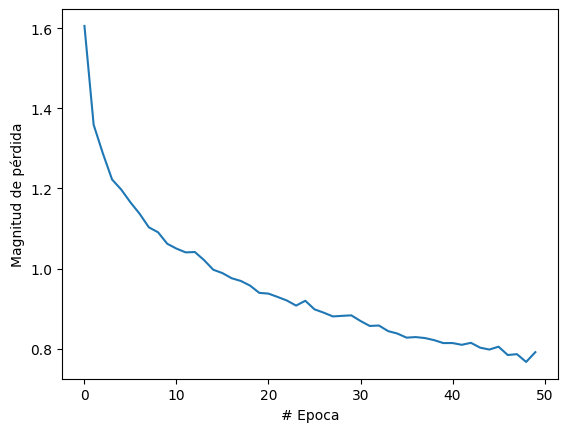

In [ ]:
import matplotlib.pyplot as plt

#Ver la funcion de perdida
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

299/299 [==============================] - 10s 30ms/step
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.56      0.79      0.66       777
           1       0.93      0.71      0.80      2349
           2       0.52      0.60      0.56       813
           3       0.81      0.91      0.85      3975
           4       0.62      0.59      0.60      1184
           5       0.48      0.13      0.20       446

    accuracy                           0.75      9544
   macro avg       0.65      0.62      0.61      9544
weighted avg       0.75      0.75      0.74      9544



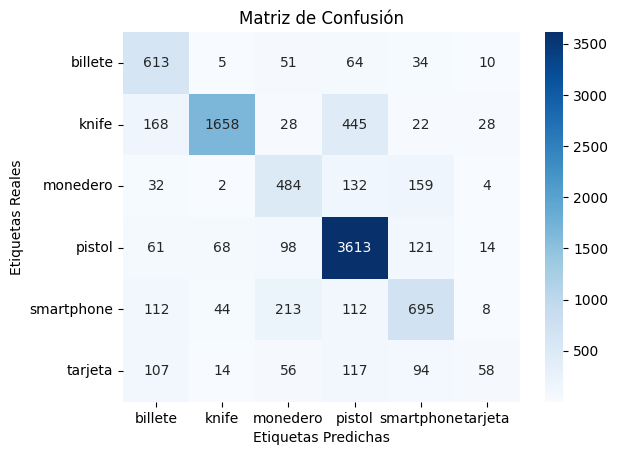

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Redimensionar las imágenes para que coincidan con el modelo CNN
datos_np_resized = np.array([tf.image.resize(im, (width_shape, height_shape)).numpy() for im in datos_np])

# Normalizar los valores de píxeles al rango [0, 1]
datos_np_resized = datos_np_resized / 255.0

# Hacer predicciones en los datos de validación
predicciones = model.predict(datos_np_resized)
etiquetas_predichas = np.argmax(predicciones, axis=1)

# Imprimir informe de clasificación
print("Informe de clasificación:")
print(classification_report(etiquetas_np, etiquetas_predichas))

# Calcular y visualizar la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_np, etiquetas_predichas)
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')
plt.show()